In [45]:
import yfinance as yf

# Definir los tickers
tickers = ['ORCL', 'NEM', 'NU']

# Crear un diccionario para almacenar los precios de cierre
closing_prices = {}

# Descargar los datos de precios históricos y extraer los precios de cierre
for ticker in tickers:
    stock = yf.Ticker(ticker)
    
    # Obtener datos históricos (precio de las acciones)
    historical_data = stock.history(period="5y")
    
    # Extraer los precios de cierre
    closing_prices[ticker] = historical_data['Close']

# Mostrar los precios de cierre de Oracle (ORCL) como ejemplo
print(closing_prices['ORCL'].head())  # Muestra las primeras filas de los precios de cierre de ORCL


Date
2019-11-25 00:00:00-05:00    52.359650
2019-11-26 00:00:00-05:00    52.313362
2019-11-27 00:00:00-05:00    52.405930
2019-11-29 00:00:00-05:00    51.970837
2019-12-02 00:00:00-05:00    51.313568
Name: Close, dtype: float64


In [40]:
# Mostrar los precios de cierre de los tickers ORCL, NEM y NU
for ticker in ['ORCL', 'NEM', 'NU']:
    print(f"Precios de cierre de {ticker}:")
    print(closing_prices[ticker].head())  # Muestra las primeras filas de los precios de cierre
    print()

Precios de cierre de ORCL:
Date
2019-11-25 00:00:00-05:00    52.359650
2019-11-26 00:00:00-05:00    52.313366
2019-11-27 00:00:00-05:00    52.405933
2019-11-29 00:00:00-05:00    51.970833
2019-12-02 00:00:00-05:00    51.313564
Name: Close, dtype: float64

Precios de cierre de NEM:
Date
2019-11-25 00:00:00-05:00    32.296970
2019-11-26 00:00:00-05:00    32.621994
2019-11-27 00:00:00-05:00    32.656208
2019-11-29 00:00:00-05:00    32.844379
2019-12-02 00:00:00-05:00    33.135193
Name: Close, dtype: float64

Precios de cierre de NU:
Date
2021-12-09 00:00:00-05:00    10.33
2021-12-10 00:00:00-05:00    11.85
2021-12-13 00:00:00-05:00    10.81
2021-12-14 00:00:00-05:00     9.92
2021-12-15 00:00:00-05:00    10.01
Name: Close, dtype: float64



In [ ]:
import yfinance as yf
import pandas as pd
import talib

import matplotlib.pyplot as plt

# Descargar datos históricos de Oracle (últimos 5 años)
symbol = "ORCL"
data = yf.download(symbol, start="2018-11-23", end="2023-11-24")

# Calcular SMA (50 y 200 días)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calcular EMA (50 y 200 días)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Calcular RSI (14 días)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Calcular Bandas de Bollinger (20 días)
data['Upper_BB'], data['Middle_BB'], data['Lower_BB'] = talib.BBANDS(data['Close'], timeperiod=20)

# Visualización de precios y medias móviles
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', color='blue')
plt.plot(data['SMA_50'], label='SMA 50 Días', linestyle='--', color='green')
plt.plot(data['SMA_200'], label='SMA 200 Días', linestyle='--', color='red')
plt.plot(data['EMA_50'], label='EMA 50 Días', linestyle='-.', color='orange')
plt.plot(data['EMA_200'], label='EMA 200 Días', linestyle='-.', color='purple')
plt.title(f"Medias Móviles para {symbol}")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()

# Visualización de RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI 14 Días', color='magenta')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title(f"RSI para {symbol}")
plt.xlabel("Fecha")
plt.ylabel("RSI")
plt.legend()
plt.grid()
plt.show()

# Visualización de Bandas de Bollinger
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', color='blue')
plt.plot(data['Upper_BB'], label='Upper BB', linestyle='--', color='red')
plt.plot(data['Middle_BB'], label='Middle BB', linestyle='--', color='green')
plt.plot(data['Lower_BB'], label='Lower BB', linestyle='--', color='red')
plt.title(f"Bandas de Bollinger para {symbol}")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  3 of 3 completed


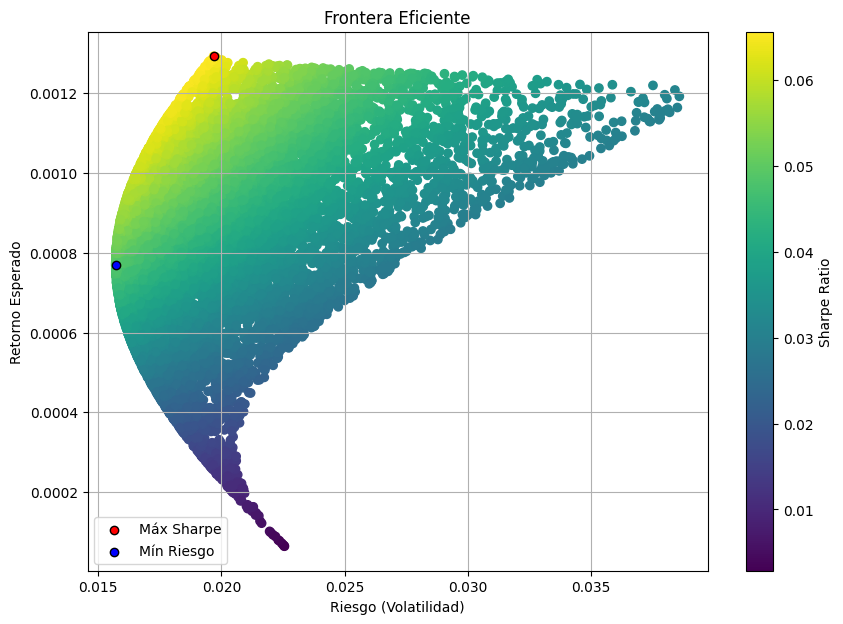

MovieWriter imagemagick unavailable; using Pillow instead.


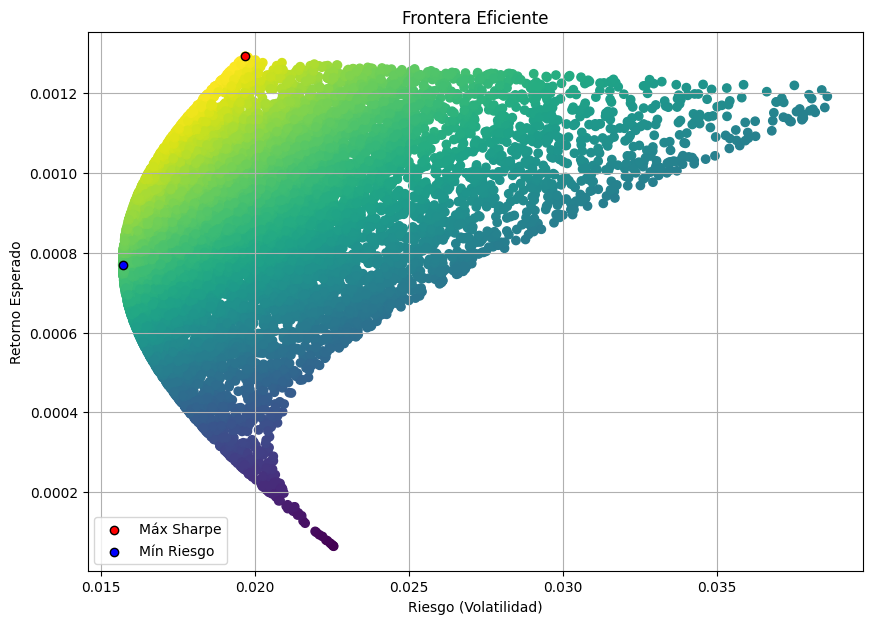

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir los tickers
tickers = ['ORCL', 'NEM', 'NU']

# Descargar los precios históricos de cierre ajustados
data = yf.download(tickers, start="2019-01-01", end="2024-11-25")['Adj Close']

# Calcular los retornos diarios
returns = data.pct_change().dropna()

# Calcular estadísticas básicas
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Simulación de portafolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Generar pesos aleatorios
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    # Guardar los pesos
    weights_record.append(weights)
    
    # Calcular retorno esperado del portafolio
    portfolio_return = np.dot(weights, mean_returns)
    # Calcular riesgo del portafolio
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Calcular la relación Sharpe (supongamos tasa libre de riesgo = 0)
    sharpe_ratio = portfolio_return / portfolio_std_dev
    
    # Registrar resultados
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe Ratio': results[2]
})

# Identificar el portafolio con la máxima relación Sharpe
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]

# Identificar el portafolio con el mínimo riesgo
min_risk_idx = results_df['Risk'].idxmin()
min_risk_portfolio = results_df.iloc[min_risk_idx]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 7))
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Máx Sharpe', edgecolors='black')
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Mín Riesgo', edgecolors='black')
plt.title('Frontera Eficiente')
plt.xlabel('Riesgo (Volatilidad)')
plt.ylabel('Retorno Esperado')
plt.legend()
plt.grid()
plt.show()
import plotly.express as px

# Crear un gráfico interactivo con Plotly
fig = px.scatter(
    results_df, x='Risk', y='Return', color='Sharpe Ratio',
    title='Frontera Eficiente',
    labels={'Risk': 'Riesgo (Volatilidad)', 'Return': 'Retorno Esperado'},
    hover_data={'Risk': ':.4f', 'Return': ':.4f', 'Sharpe Ratio': ':.4f'}
)

# Añadir los puntos de máximo Sharpe y mínimo riesgo
fig.add_scatter(
    x=[max_sharpe_portfolio['Risk']], y=[max_sharpe_portfolio['Return']],
    mode='markers', marker=dict(color='red', size=10, symbol='x'),
    name='Máx Sharpe'
)
fig.add_scatter(
    x=[min_risk_portfolio['Risk']], y=[min_risk_portfolio['Return']],
    mode='markers', marker=dict(color='blue', size=10, symbol='x'),
    name='Mín Riesgo'
)

fig.show()
import matplotlib.animation as animation

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 7))

# Función para actualizar el gráfico en cada frame
def update(frame):
    ax.clear()
    ax.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', marker='o')
    ax.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], color='red', label='Máx Sharpe', edgecolors='black')
    ax.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], color='blue', label='Mín Riesgo', edgecolors='black')
    ax.set_title('Frontera Eficiente')
    ax.set_xlabel('Riesgo (Volatilidad)')
    ax.set_ylabel('Retorno Esperado')
    ax.legend()
    ax.grid()

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=range(100), repeat=True)

# Guardar la animación como un archivo GIF
ani.save('frontera_eficiente.gif', writer='imagemagick')

# Mostrar la animación
plt.show()


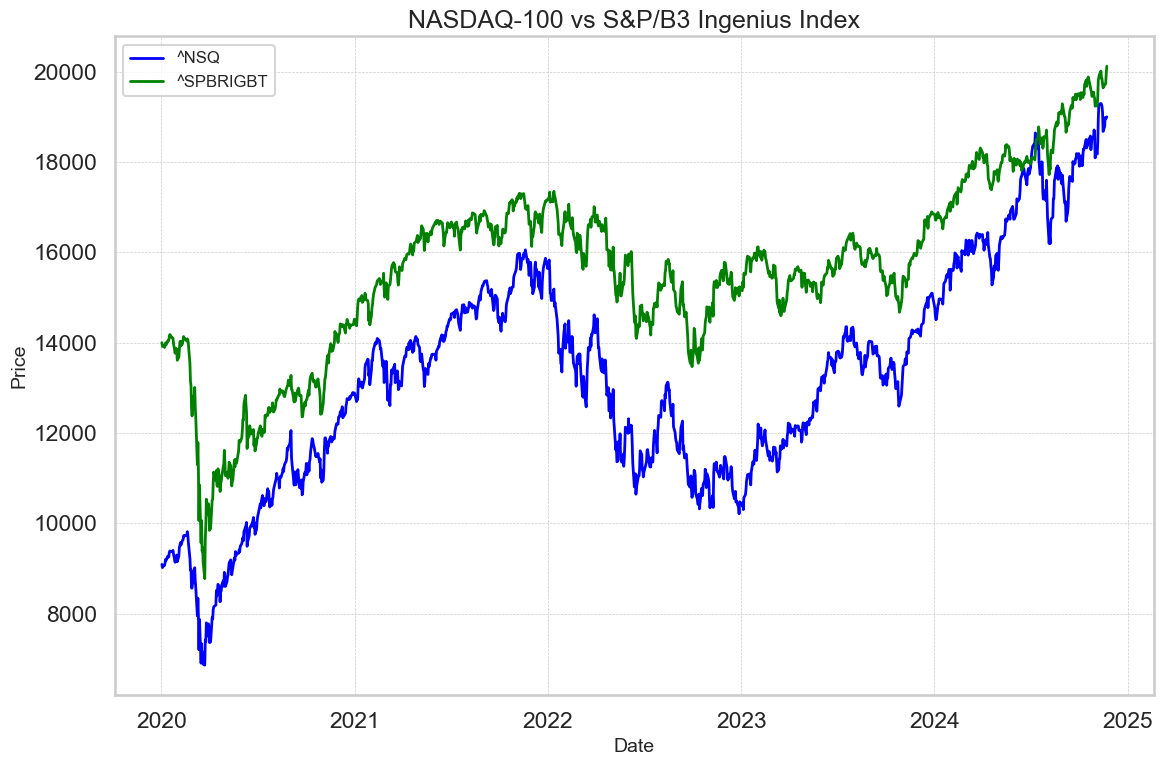

In [4]:
import seaborn as sns

# Configurar el estilo del gráfico
sns.set(style='whitegrid', context='talk')

# Graficar los datos
plt.figure(figsize=(12, 8))
sns.lineplot(data=nasdaq_data['Close'], label='^NSQ', color='blue', linewidth=2)
sns.lineplot(data=nyse_data['Close'], label='^SPBRIGBT', color='green', linewidth=2)
plt.title('NASDAQ-100 vs S&P/B3 Ingenius Index', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Simulacion de Monte Carlo

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

# 1. Descargar datos históricos de los activos
tickers = ["ORCL", "NU", "NEM"]
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start="2019-11-25", end="2024-11-25")[['Close']]

# Convertir datos a un DataFrame
prices = pd.concat(data, axis=1)
prices.columns = tickers

# 2. Calcular rendimientos diarios
returns = prices.pct_change().dropna()

# 3. Simulación de Monte Carlo
def monte_carlo_simulation(initial_price, mu, sigma, days, simulations):
    """
    Realiza una simulación de Monte Carlo para un activo.
    
    initial_price: Precio inicial del activo.
    mu: Rendimiento medio diario.
    sigma: Desviación estándar diaria.
    days: Número de días de simulación.
    simulations: Número de simulaciones.
    """
    dt = 1  # Incremento diario
    price_matrix = np.zeros((days, simulations))
    price_matrix[0] = initial_price
    
    for t in range(1, days):
        # Generar cambios porcentuales aleatorios
        random_shocks = np.random.normal(mu * dt, sigma * np.sqrt(dt), simulations)
        price_matrix[t] = price_matrix[t - 1] * np.exp(random_shocks)
    
    return price_matrix

# Parámetros
days = 5 * 252  # 5 años de días hábiles
simulations = 1000  # Número de simulaciones

# Crear un dataset acumulado para almacenar resultados
all_simulations = {}

# Ejecutar simulación para cada activo
for ticker in tickers:
    last_price = prices[ticker].iloc[-1]
    mu = returns[ticker].mean()
    sigma = returns[ticker].std()
    
    # Simulación de Monte Carlo
    simulated_prices = monte_carlo_simulation(last_price, mu, sigma, days, simulations)
    
    # Guardar en el dataset acumulado
    simulation_dates = pd.date_range(prices.index[-1] + pd.Timedelta(days=1), periods=days, freq='B')
    simulation_df = pd.DataFrame(simulated_prices, index=simulation_dates)
    all_simulations[ticker] = simulation_df

# 4. Crear un dataset combinado
combined_df = pd.concat(all_simulations, axis=1, keys=tickers)

# 5. Visualizar simulaciones para un ejemplo (Oracle)
import plotly.express as px

# Crear un gráfico interactivo con Plotly
fig = px.line()

# Añadir simulaciones al gráfico
for i in range(10):  # Mostrar 10 simulaciones
    fig.add_scatter(x=all_simulations["ORCL"].index, y=all_simulations["ORCL"].iloc[:, i], mode='lines', name=f'Simulación {i+1}')

fig.update_layout(
    title="Simulaciones de Monte Carlo: Oracle (ORCL)",
    xaxis_title="Fecha",
    yaxis_title="Precio simulado",
    showlegend=True
)

# Mostrar el gráfico en Streamlit
st.plotly_chart(fig)

# Guardar resultados en un archivo CSV
combined_df.to_csv("montecarlo_simulations.csv")

# Crear un slicer para seleccionar el ticker
selected_ticker = st.selectbox("Selecciona un ticker", tickers)

# Crear un gráfico interactivo para el ticker seleccionado
fig_ticker = px.line()

# Añadir simulaciones al gráfico del ticker seleccionado
for i in range(10):  # Mostrar 10 simulaciones
    fig_ticker.add_scatter(x=all_simulations[selected_ticker].index, y=all_simulations[selected_ticker].iloc[:, i], mode='lines', name=f'Simulación {i+1}')

fig_ticker.update_layout(
    title=f"Simulaciones de Monte Carlo: {selected_ticker}",
    xaxis_title="Fecha",
    yaxis_title="Precio simulado",
    showlegend=True
)

# Mostrar el gráfico del ticker seleccionado en Streamlit
st.plotly_chart(fig_ticker)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2024-11-25 10:18:23.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 10:18:23.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 10:18:23.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 10:18:23.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 10:18:27.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 10:18:27.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 10:18:27.336 Thread 'MainT

DeltaGenerator()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


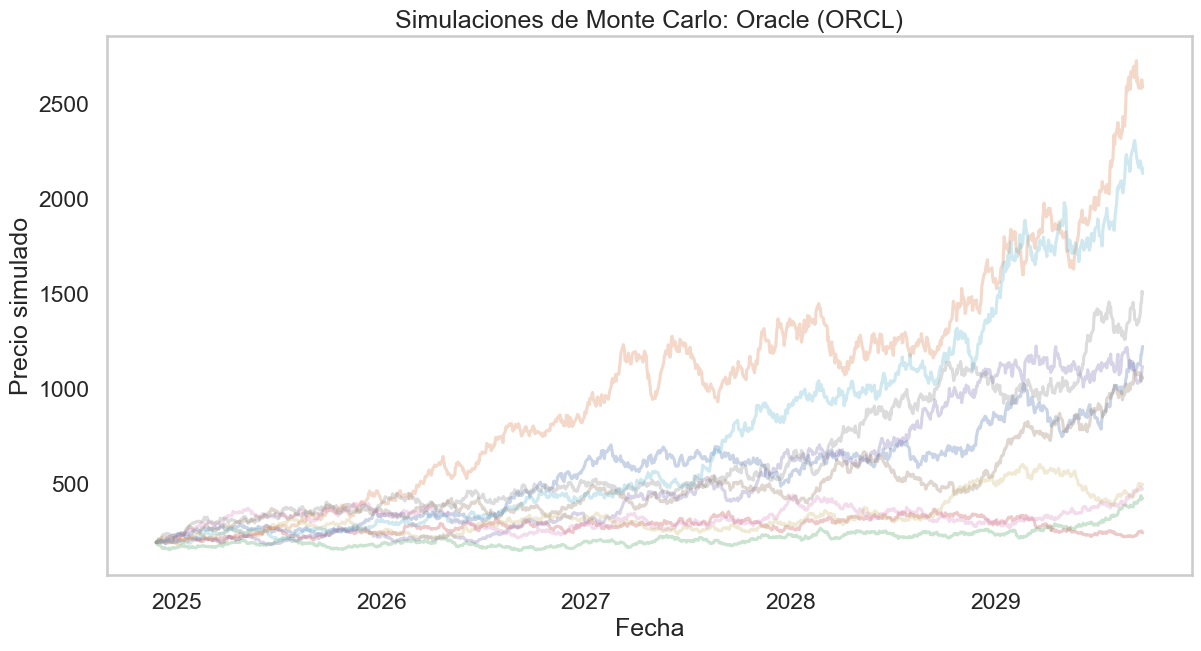

            ORCL_Simulacion1  ORCL_Simulacion2  ORCL_Simulacion3  \
2024-11-25        192.289993        192.289993        192.289993   
2024-11-26        191.415579        190.651366        185.279743   
2024-11-27        195.096063        196.138881        182.369230   
2024-11-28        193.634391        200.110581        179.437438   
2024-11-29        190.213565        208.466506        181.199314   

            ORCL_Simulacion4  ORCL_Simulacion5  ORCL_Simulacion6  \
2024-11-25        192.289993        192.289993        192.289993   
2024-11-26        190.266860        196.271691        198.156449   
2024-11-27        195.255048        191.022377        199.911773   
2024-11-28        195.546195        194.678988        199.276080   
2024-11-29        198.560682        195.849292        199.639870   

            ORCL_Simulacion7  ORCL_Simulacion8  ORCL_Simulacion9  \
2024-11-25        192.289993        192.289993        192.289993   
2024-11-26        195.152387        193.108985

In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración inicial
tickers = ["ORCL", "NU", "NEM"]
years = 5
simulations = 1000
days = years * 252  # Aproximación a días hábiles
all_simulations = {}

# 2. Descargar datos y procesar cada activo
for ticker in tickers:
    # Descargar datos históricos del activo
    data = yf.download(ticker, start="2019-11-25", end="2024-11-25")['Close']
    
    # Calcular rendimientos diarios
    returns = data.pct_change().dropna()
    
    # Parámetros estadísticos
    last_price = data.iloc[-1]
    mu = returns.mean()
    sigma = returns.std()
    
    # Función de simulación Monte Carlo
    def monte_carlo_simulation(initial_price, mu, sigma, days, simulations):
        dt = 1
        price_matrix = np.zeros((days, simulations))
        price_matrix[0] = initial_price
        for t in range(1, days):
            random_shocks = np.random.normal(mu * dt, sigma * np.sqrt(dt), simulations)
            price_matrix[t] = price_matrix[t - 1] * np.exp(random_shocks)
        return price_matrix

    # Realizar simulación
    simulated_prices = monte_carlo_simulation(last_price, mu, sigma, days, simulations)
    
    # Generar fechas de simulación
    simulation_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=days, freq='B')
    
    # Convertir simulaciones a DataFrame
    simulation_df = pd.DataFrame(simulated_prices, index=simulation_dates)
    simulation_df.columns = [f"{ticker}_Simulacion{i + 1}" for i in range(simulations)]
    
    # Almacenar en el diccionario general
    all_simulations[ticker] = simulation_df

# 3. Combinar simulaciones de todos los activos
combined_simulations = pd.concat(all_simulations.values(), axis=1)

# 4. Guardar los resultados en un archivo CSV
combined_simulations.to_csv("montecarlo_all_assets_simulations.csv")

# 5. Visualizar algunas simulaciones (por ejemplo, ORCL)
plt.figure(figsize=(14, 7))
plt.plot(all_simulations["ORCL"].iloc[:, :10], alpha=0.3)  # Mostrar 10 simulaciones
plt.title("Simulaciones de Monte Carlo: Oracle (ORCL)")
plt.xlabel("Fecha")
plt.ylabel("Precio simulado")
plt.grid()
plt.show()

# Visualizar parte del DataFrame resultante
print(combined_simulations.head())


In [19]:
combined_simulations

,ORCL_Simulacion1,ORCL_Simulacion2,ORCL_Simulacion3,ORCL_Simulacion4,ORCL_Simulacion5,ORCL_Simulacion6,ORCL_Simulacion7,ORCL_Simulacion8,ORCL_Simulacion9,ORCL_Simulacion10,...,NEM_Simulacion991,NEM_Simulacion992,NEM_Simulacion993,NEM_Simulacion994,NEM_Simulacion995,NEM_Simulacion996,NEM_Simulacion997,NEM_Simulacion998,NEM_Simulacion999,NEM_Simulacion1000
2024-11-25,192.289993,192.289993,192.289993,192.289993,192.289993,192.289993,192.289993,192.289993,192.289993,192.289993,...,43.380001,43.380001,43.380001,43.380001,43.380001,43.380001,43.380001,43.380001,43.380001,43.380001
2024-11-26,191.415579,190.651366,185.279743,190.266860,196.271691,198.156449,195.152387,193.108985,191.758395,194.123634,...,43.520516,43.580782,42.342233,43.495465,41.427927,44.111067,43.260429,44.509067,44.529145,45.147394
2024-11-27,195.096063,196.138881,182.369230,195.255048,191.022377,199.911773,191.221624,196.550125,200.763612,195.884597,...,43.080881,44.069620,40.552083,43.392452,40.723446,43.941949,44.066133,43.032828,45.570965,45.744212
2024-11-28,193.634391,200.110581,179.437438,195.546195,194.678988,199.276080,194.588634,203.209893,194.664098,194.078775,...,42.581247,44.231314,39.837735,41.776841,40.999862,43.964778,43.110050,42.077722,46.429233,44.558644
2024-11-29,190.213565,208.466506,181.199314,198.560682,195.849292,199.639870,196.026717,211.183231,197.724855,200.920827,...,41.567610,44.704081,40.822517,42.490836,44.553286,45.454288,42.885796,42.965596,45.649994,45.219803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029-09-17,1125.473883,2582.426551,416.866470,248.967433,1036.397631,1084.226344,473.014287,1399.488171,501.071142,2200.491526,...,79.739377,5.307686,27.541313,30.210104,11.898422,89.614230,69.873519,19.390517,163.478582,60.198859
2029-09-18,1179.759166,2582.555127,438.810792,247.390820,1071.956751,1043.645933,482.594071,1448.037219,491.874597,2180.479658,...,77.942802,5.412739,27.216201,30.959810,11.671330,86.416761,66.920427,19.555596,162.850555,60.564104
2029-09-19,1182.212990,2627.769719,418.829121,252.890220,1059.394601,1044.234062,469.509767,1455.680828,500.297981,2154.282748,...,75.585063,5.433013,26.546297,31.000424,11.613371,85.477612,66.543805,19.372541,162.123154,61.054139
2029-09-20,1204.394146,2626.567901,423.042511,246.974564,1112.081999,1063.974299,473.039417,1514.377731,495.596037,2166.555145,...,72.676269,5.696402,26.955784,30.917929,11.752868,86.554383,64.647232,19.361678,164.067403,61.229088


[*********************100%***********************]  1 of 1 completed

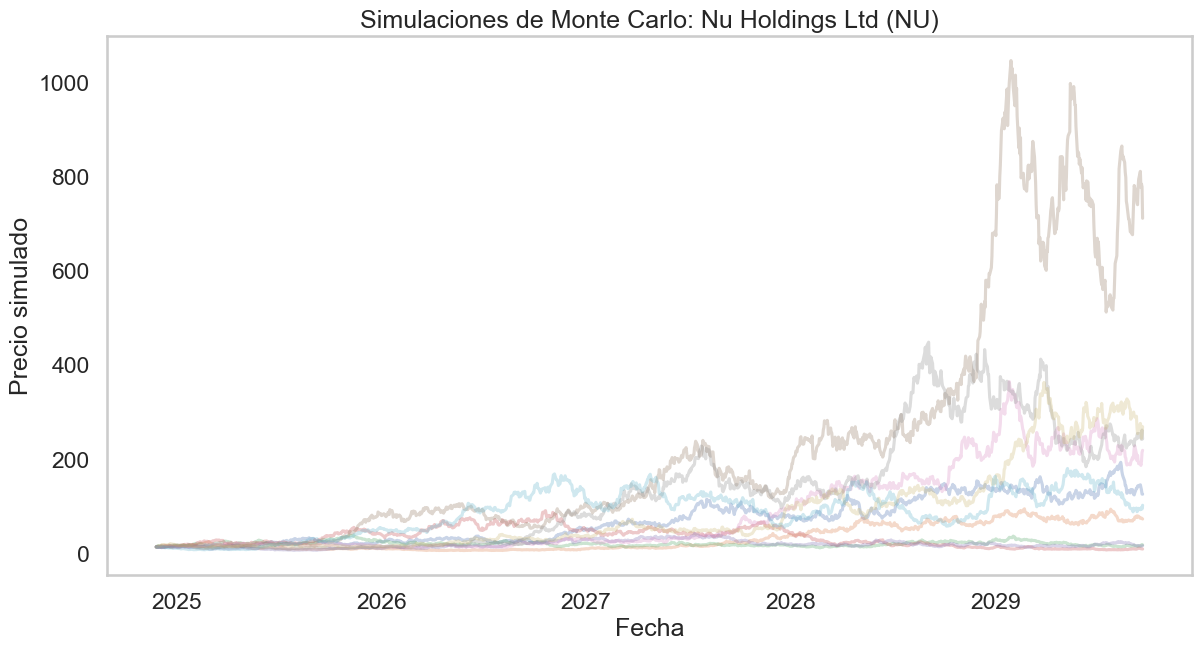

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descargar datos históricos de NU
ticker = "NU"
data = yf.download(ticker, start="2019-11-25", end="2024-11-25")['Close']

# 2. Calcular rendimientos diarios
returns = data.pct_change().dropna()

# 3. Parámetros estadísticos
last_price = data.iloc[-1]
mu = returns.mean()
sigma = returns.std()

# 4. Simulación de Monte Carlo
def monte_carlo_simulation(initial_price, mu, sigma, days, simulations):
    """
    Realiza una simulación de Monte Carlo para un activo.
    
    initial_price: Precio inicial del activo.
    mu: Rendimiento medio diario.
    sigma: Desviación estándar diaria.
    days: Número de días de simulación.
    simulations: Número de simulaciones.
    """
    dt = 1  # Incremento diario
    price_matrix = np.zeros((days, simulations))
    price_matrix[0] = initial_price
    
    for t in range(1, days):
        # Generar cambios porcentuales aleatorios
        random_shocks = np.random.normal(mu * dt, sigma * np.sqrt(dt), simulations)
        price_matrix[t] = price_matrix[t - 1] * np.exp(random_shocks)
    
    return price_matrix

# Configuración de simulación
days = 5 * 252  # 5 años de días hábiles
simulations = 1000  # Número de simulaciones

# Realizar simulación
simulated_prices = monte_carlo_simulation(last_price, mu, sigma, days, simulations)

# Crear DataFrame con resultados
simulation_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=days, freq='B')
simulation_df = pd.DataFrame(simulated_prices, index=simulation_dates)

# 5. Visualizar simulaciones
plt.figure(figsize=(14, 7))
plt.plot(simulation_df.iloc[:, :10], alpha=0.3)  # Mostrar 10 simulaciones
plt.title("Simulaciones de Monte Carlo: Nu Holdings Ltd (NU)")
plt.xlabel("Fecha")
plt.ylabel("Precio simulado")
plt.grid()
plt.show()

# 6. Guardar resultados en un archivo CSV
simulation_df.to_csv("montecarlo_NU_simulations.csv")



[*********************100%***********************]  1 of 1 completed


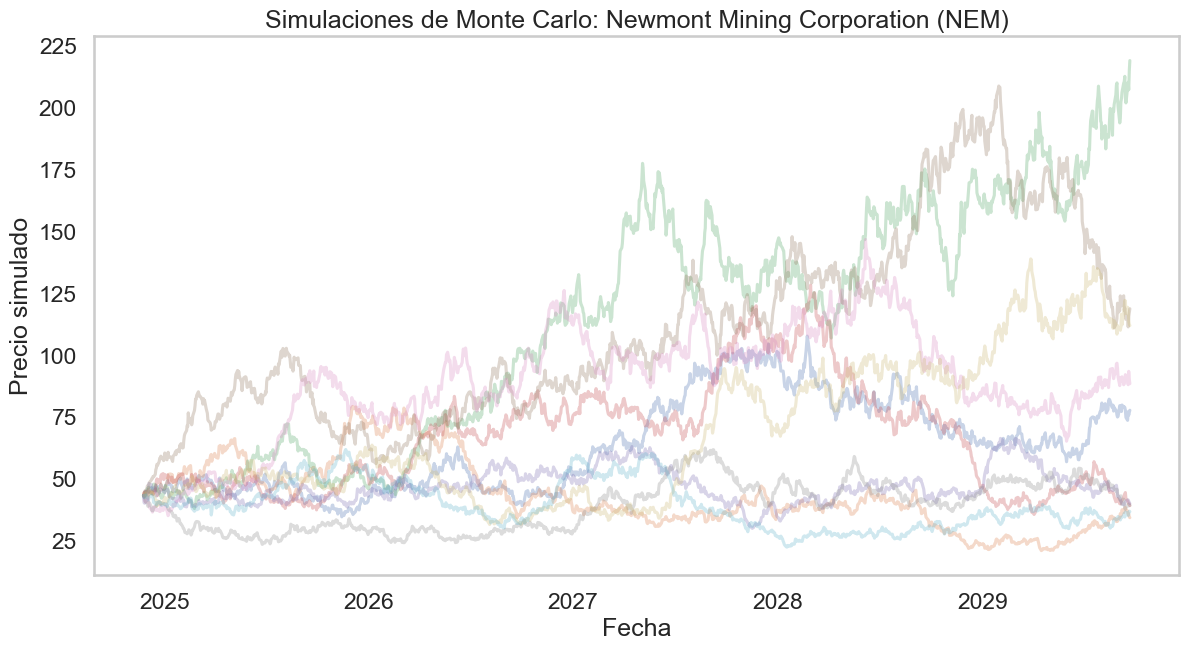

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descargar datos históricos de NEM
ticker = "NEM"
data = yf.download(ticker, start="2019-11-25", end="2024-11-25")['Close']

# 2. Calcular rendimientos diarios
returns = data.pct_change().dropna()

# 3. Parámetros estadísticos
last_price = data.iloc[-1]
mu = returns.mean()
sigma = returns.std()

# 4. Simulación de Monte Carlo
def monte_carlo_simulation(initial_price, mu, sigma, days, simulations):
    """
    Realiza una simulación de Monte Carlo para un activo.
    
    initial_price: Precio inicial del activo.
    mu: Rendimiento medio diario.
    sigma: Desviación estándar diaria.
    days: Número de días de simulación.
    simulations: Número de simulaciones.
    """
    dt = 1  # Incremento diario
    price_matrix = np.zeros((days, simulations))
    price_matrix[0] = initial_price
    
    for t in range(1, days):
        # Generar cambios porcentuales aleatorios
        random_shocks = np.random.normal(mu * dt, sigma * np.sqrt(dt), simulations)
        price_matrix[t] = price_matrix[t - 1] * np.exp(random_shocks)
    
    return price_matrix

# Configuración de simulación
days = 5 * 252  # 5 años de días hábiles
simulations = 1000  # Número de simulaciones

# Realizar simulación
simulated_prices = monte_carlo_simulation(last_price, mu, sigma, days, simulations)

# Crear DataFrame con resultados
simulation_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=days, freq='B')
simulation_df = pd.DataFrame(simulated_prices, index=simulation_dates)

# 5. Visualizar simulaciones
plt.figure(figsize=(14, 7))
plt.plot(simulation_df.iloc[:, :10], alpha=0.3)  # Mostrar 10 simulaciones
plt.title("Simulaciones de Monte Carlo: Newmont Mining Corporation (NEM)")
plt.xlabel("Fecha")
plt.ylabel("Precio simulado")
plt.grid()
plt.show()

# 6. Guardar resultados en un archivo CSV
simulation_df.to_csv("montecarlo_NEM_simulations.csv")


[*********************100%***********************]  1 of 1 completed


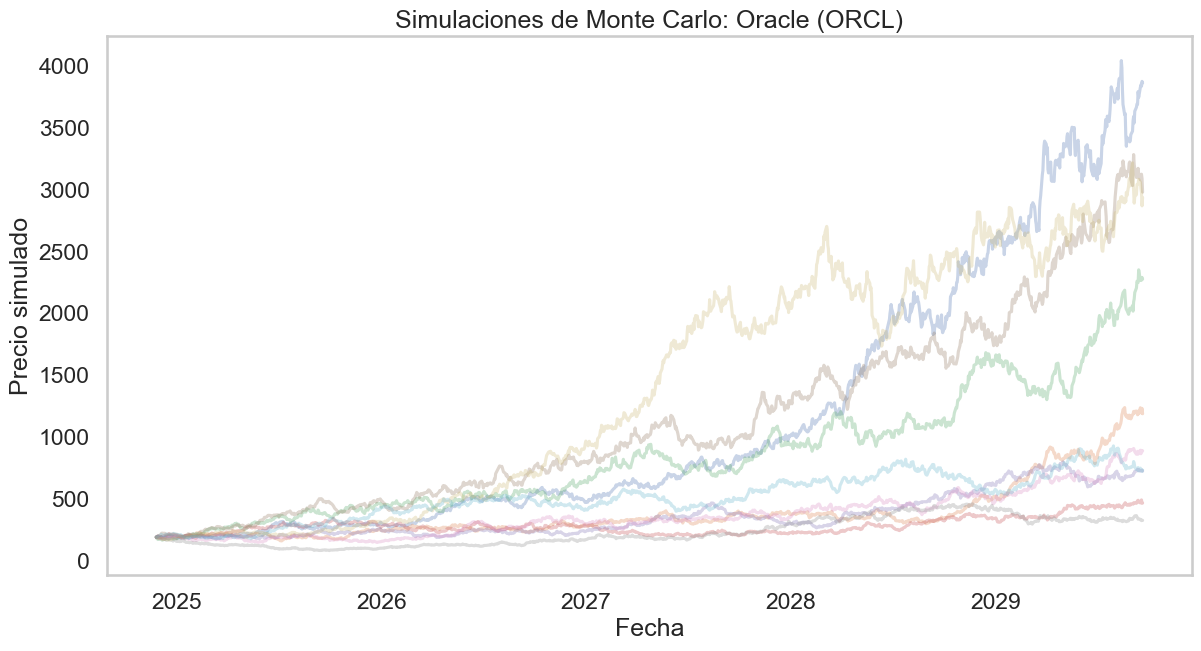

            Simulacion1  Simulacion2  Simulacion3  Simulacion4  Simulacion5  \
2024-11-25   192.289993   192.289993   192.289993   192.289993   192.289993   
2024-11-26   195.201763   187.833902   181.696577   197.788328   193.529855   
2024-11-27   197.833761   194.125553   180.251443   199.331783   190.479573   
2024-11-28   193.320892   191.770345   173.093238   203.084170   189.076408   
2024-11-29   191.426425   191.426904   175.392056   202.309278   197.228586   

            Simulacion6  Simulacion7  Simulacion8  Simulacion9  Simulacion10  \
2024-11-25   192.289993   192.289993   192.289993   192.289993    192.289993   
2024-11-26   187.859165   192.505400   190.403885   190.700369    195.987047   
2024-11-27   193.370526   194.109063   189.857826   189.652376    194.538529   
2024-11-28   199.387165   185.153460   185.698744   188.574452    200.759964   
2024-11-29   205.379604   184.339453   180.952218   182.905894    202.996225   

            ...  Simulacion991  Simulacion99

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descargar datos históricos de ORCL
ticker = "ORCL"
data = yf.download(ticker, start="2019-11-25", end="2024-11-25")['Close']

# 2. Calcular rendimientos diarios
returns = data.pct_change().dropna()

# 3. Parámetros estadísticos
last_price = data.iloc[-1]
mu = returns.mean()
sigma = returns.std()

# 4. Simulación de Monte Carlo
def monte_carlo_simulation(initial_price, mu, sigma, days, simulations):
    """
    Realiza una simulación de Monte Carlo para un activo.
    
    initial_price: Precio inicial del activo.
    mu: Rendimiento medio diario.
    sigma: Desviación estándar diaria.
    days: Número de días de simulación.
    simulations: Número de simulaciones.
    """
    dt = 1  # Incremento diario
    price_matrix = np.zeros((days, simulations))
    price_matrix[0] = initial_price
    
    for t in range(1, days):
        # Generar cambios porcentuales aleatorios
        random_shocks = np.random.normal(mu * dt, sigma * np.sqrt(dt), simulations)
        price_matrix[t] = price_matrix[t - 1] * np.exp(random_shocks)
    
    return price_matrix

# Configuración de simulación
years = 5
days = years * 252  # 5 años de días hábiles
simulations = 1000  # Número de simulaciones

# Realizar simulación
simulated_prices = monte_carlo_simulation(last_price, mu, sigma, days, simulations)

# Crear DataFrame con resultados
simulation_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=days, freq='B')
simulation_df = pd.DataFrame(simulated_prices, index=simulation_dates)
simulation_df.columns = [f"Simulacion{i + 1}" for i in range(simulations)]

# 5. Visualizar simulaciones
plt.figure(figsize=(14, 7))
plt.plot(simulation_df.iloc[:, :10], alpha=0.3)  # Mostrar 10 simulaciones
plt.title("Simulaciones de Monte Carlo: Oracle (ORCL)")
plt.xlabel("Fecha")
plt.ylabel("Precio simulado")
plt.grid()
plt.show()

# 6. Guardar resultados en un archivo CSV
simulation_df.to_csv("montecarlo_ORCL_simulations.csv")

# Visualizar parte del DataFrame resultante
print(simulation_df.head())


Precio promedio al final del año: $148.58
Percentil 5%: $64.56, Percentil 95%: $276.83


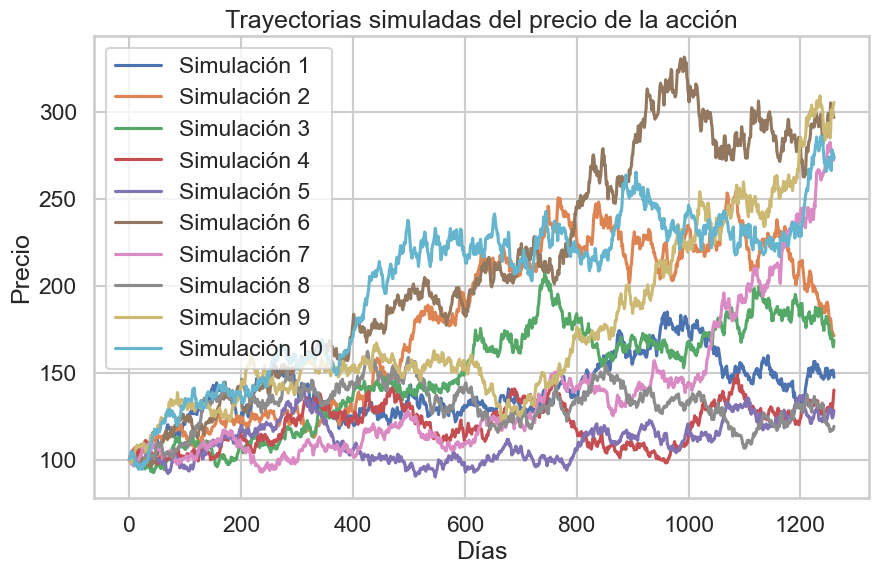

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
S0 = 100  # Precio inicial
mu = 0.08  # Tasa esperada de retorno
sigma = 0.2  # Volatilidad
T = 5  # Tiempo en años
n_simulations = 10000  # Número de simulaciones
n_steps = 252 * 5 # Días de trading en un año
dt = T / n_steps  # Intervalo de tiempo

# Generar simulaciones
np.random.seed(42)
paths = np.zeros((n_steps + 1, n_simulations))
paths[0] = S0

for t in range(1, n_steps + 1):
    z = np.random.standard_normal(n_simulations)  # Números aleatorios normales
    paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * z * np.sqrt(dt))

# Resultados
final_prices = paths[-1]
mean_price = np.mean(final_prices)
percentiles = np.percentile(final_prices, [5, 95])

print(f"Precio promedio al final del año: ${mean_price:.2f}")
print(f"Percentil 5%: ${percentiles[0]:.2f}, Percentil 95%: ${percentiles[1]:.2f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])  # Mostrar 10 trayectorias
plt.title("Trayectorias simuladas del precio de la acción")
plt.xlabel("Días")
plt.ylabel("Precio")
plt.legend([f"Simulación {i}" for i in range(1, 11)])
plt.grid(True)
plt.show()


In [ ]:
# Descargar datos históricos de los índices NASDAQ y NYSE
nasdaq_data = yf.download('^IXIC', start='2020-01-01', end='2023-01-01')
nyse_data = yf.download('^NYA', start='2020-01-01', end='2023-01-01')

# Graficar los datos
plt.figure(figsize=(14, 7))
plt.plot(nasdaq_data['Close'], label='NASDAQ')
plt.plot(nyse_data['Close'], label='NYSE')
plt.title('Índices NASDAQ y NYSE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


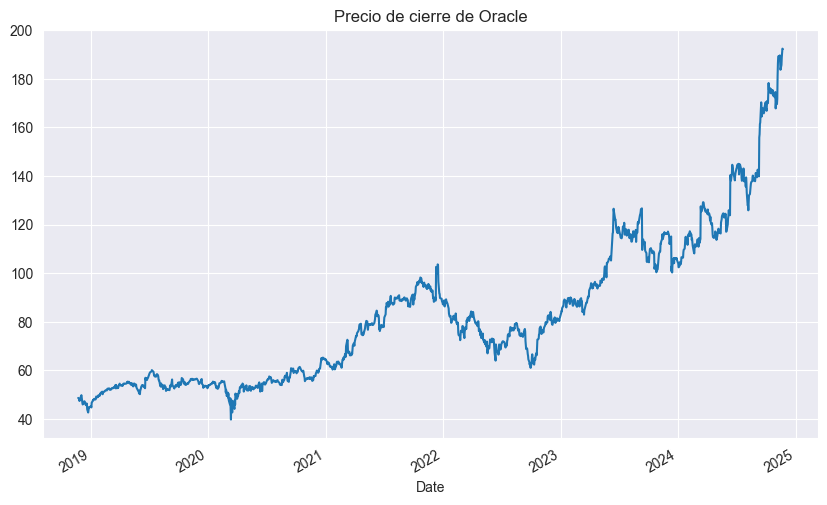

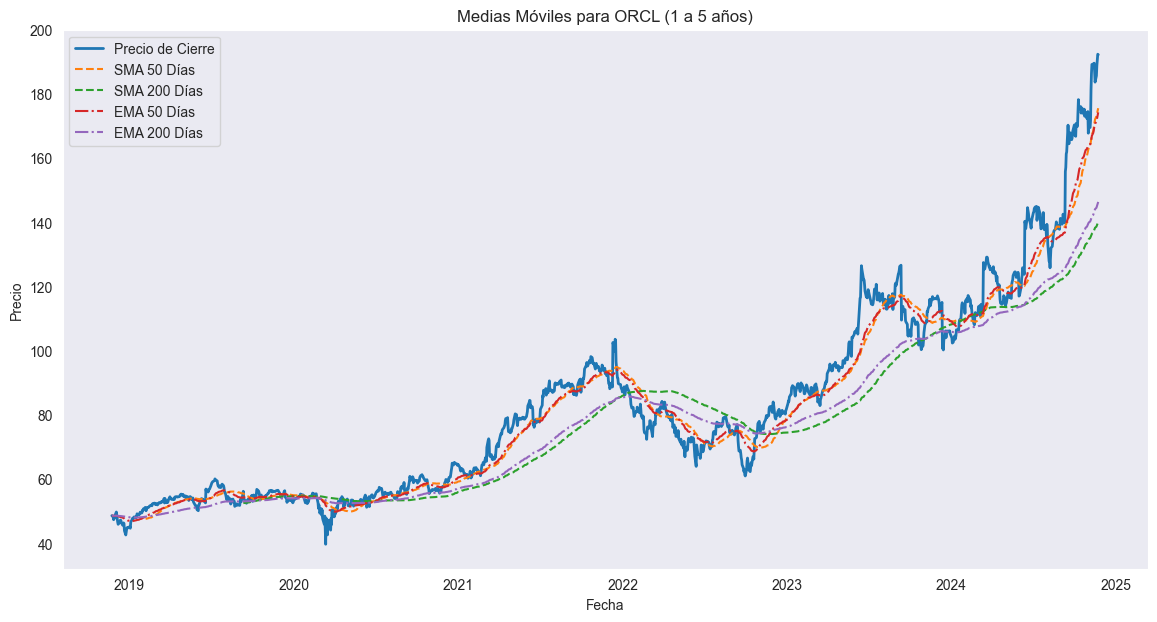

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos históricos de Oracle (últimos 5 años)
symbol = "ORCL"
data = yf.download(symbol, start="2018-11-23", end="2024-11-24")
data['Close'].plot(title="Precio de cierre de Oracle", figsize=(10, 6))

# Calcular SMA (50 y 200 días como ejemplo)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calcular EMA (50 y 200 días como ejemplo)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', linewidth=2)
plt.plot(data['SMA_50'], label='SMA 50 Días', linestyle='--')
plt.plot(data['SMA_200'], label='SMA 200 Días', linestyle='--')
plt.plot(data['EMA_50'], label='EMA 50 Días', linestyle='-.')
plt.plot(data['EMA_200'], label='EMA 200 Días', linestyle='-.')
plt.title(f"Medias Móviles para {symbol} (1 a 5 años)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Descargar datos históricos de ORCL
ticker = "ORCL"
data = yf.download(ticker, start="2019-11-25", end="2024-11-25")  # Últimos 5 años

# 2. Calcular SMA y EMA
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# 3. Visualizar datos históricos y medias móviles
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label="Precio de Cierre", alpha=0.7)
plt.plot(data['SMA_50'], label="SMA 50", linestyle="--")
plt.plot(data['EMA_50'], label="EMA 50", linestyle="--")
plt.title(f"Precio de {ticker} con SMA y EMA")
plt.legend()
plt.show()

# 4. Preparar datos para predicción
data['Return'] = data['Close'].pct_change()
data = data.dropna()

# Variables predictoras y objetivo
X = data[['SMA_50', 'EMA_50', 'Return']].dropna()
y = data['Close'][X.index]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar un modelo de predicción
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluar el modelo
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Error cuadrático medio (RMSE): {rmse:.2f}")

# 7. Predecir precios futuros
future_data = data[['SMA_50', 'EMA_50', 'Return']].iloc[-1:]
future_prices = []

for i in range(1, 5 * 252):  # 252 días hábiles por año
    predicted_price = model.predict(future_data)[0]
    future_prices.append(predicted_price)
    new_row = {
        'SMA_50': np.mean(future_prices[-50:]) if len(future_prices) >= 50 else predicted_price,
        'EMA_50': (predicted_price * (2 / (50 + 1))) + (future_data['EMA_50'].values[0] * (1 - (2 / (50 + 1)))),
        'Return': (predicted_price - future_data['EMA_50'].values[0]) / future_data['EMA_50'].values[0]
    }
    future_data = pd.DataFrame([new_row])

# Crear DataFrame de predicciones futuras
# Crear DataFrame de predicciones futuras
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=len(future_prices), freq='B')
future_df = pd.DataFrame({'Date': future_dates[:len(future_prices)], 'Predicted_Price': future_prices})
future_df.set_index('Date', inplace=True)






ModuleNotFoundError: No module named 'sklearn'

[*********************100%***********************]  1 of 1 completed
c:\Users\ediso\Desktop\Proyects\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0447
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0036
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0022
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0020
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0018
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0020
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0014
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012
Epoc

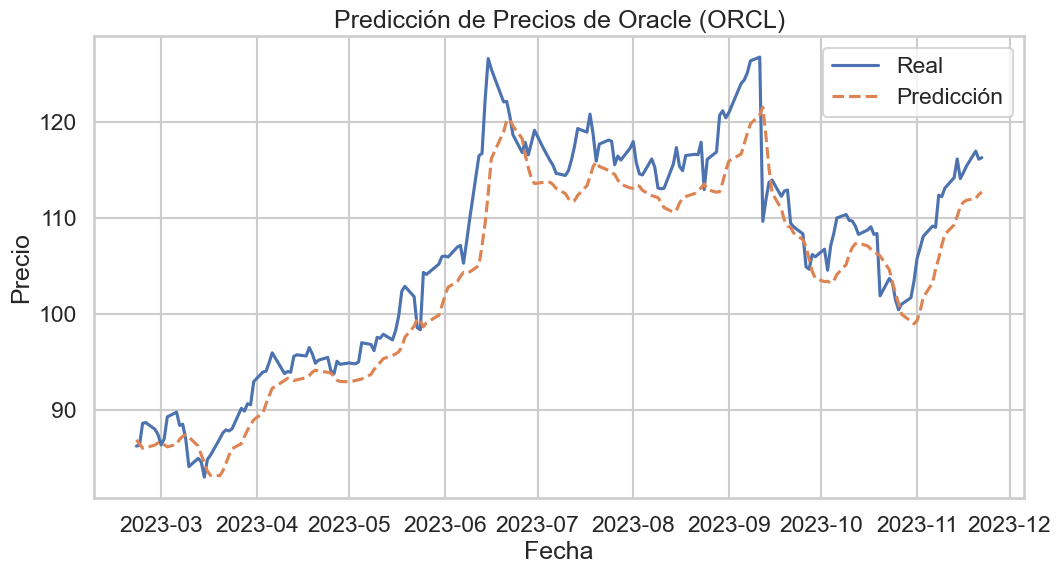

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Descargar datos de Oracle (últimos 5 años)
symbol = "ORCL"
data = yf.download(symbol, start="2019-11-23", end="2023-11-24")
prices = data['Close']

# Preprocesamiento: Escalar datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices.values.reshape(-1, 1))

# Crear conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Crear secuencias para LSTM (usando 60 días anteriores como entrada)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Construir modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=32, epochs=50)

# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(prices.index[-len(predictions):], prices.values[-len(predictions):], label='Real')
plt.plot(prices.index[-len(predictions):], predictions, label='Predicción', linestyle='--')
plt.title('Predicción de Precios de Oracle (ORCL)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


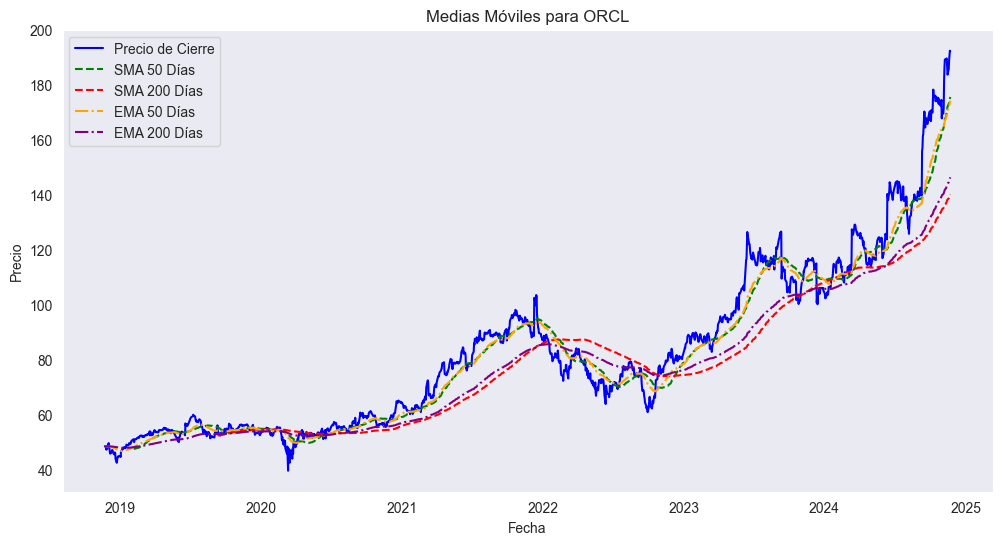

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos de Oracle (últimos 5 años)
symbol = "ORCL"
data = yf.download(symbol, start="2018-11-23", end="2029-11-24")

# Calcular SMA y EMA
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Precio de Cierre', color='blue')
plt.plot(data['SMA_50'], label='SMA 50 Días', linestyle='--', color='green')
plt.plot(data['SMA_200'], label='SMA 200 Días', linestyle='--', color='red')
plt.plot(data['EMA_50'], label='EMA 50 Días', linestyle='-.', color='orange')
plt.plot(data['EMA_200'], label='EMA 200 Días', linestyle='-.', color='purple')
plt.title(f"Medias Móviles para {symbol}")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()
